# Data Analysis on Stock Trades

Jiatu Li, Ziling Gong

## Summary of Findings

### Introduction
In this project we are going to analyze stock trade made by members of the US House of Representatives. We'd like to gain more idea about whether party representatives hold different transaction style, and what the most popular companies Representatives like to invest in. This stock dataset is collected and maintained by Timothy Carambat as part of the House Stock Watcher project. This dataset contains transaction information (date, type, owner type, ticker, amount range, etc.), and investors' information (representative's name, and their district code) from 2017 till 2022. Since we are interested in representatives' party affiliation, we use another data set that contain Representative district code and their Party. Thus, we are able to match transaction information with party affiliation. 

### Cleaning and EDA
Since we miss party affiliation information in original stock.csv file, we merge another dataframe containing Representatives' district keys and their parties to it. Furthermore, we find that the NaN values are not stored as `np.NaN` in dataframe, so we replace `--` with `np.NaN`. It will provide us an accurate understanding when we are checking missingness type. We convert time columns to `pd.datatime` object. It help us to extract time values and discuss questions related to time. There existed some strange time string, so we fixed the time string before convert to `datetime` object. More detailed cleaning steps are demonstrated in relative section below.\
In exploratary data analysis party, we first obtain a overall 
look of two Party's transaction context. We find that Democratic representatives mae more transactions than Republicans from 2017-2022. In 2020 when COVID 19 outbroke, Republican made more successful transactions that have capital gains over 200 usd. We also take a look of transaction type of two parties, we see that both party `purchase` the most, and have roughly similar distribution of transaction shape. We will test the observation in hypothesis test section. Plus, we find that the top 10 popular tickers are MSFT, AAPL, MTAP, TDDXX, etc. We will discuss it closely in next section. Graphs are shown in EDA section below.
### Assessment of Missingness
We check `NaN` values of each column, and find that `ower` has 6668 missing values, `ticker` has 1147, and `asset_description` has 4. Since `owner` has non-trivial missing values, we are testing MAR on it. We compute permutation test on `owner` with `Party`, `type` and `cap_gains_over_200_usd`.\
Before doing it, we checked missingness type of `ticker` and `asset description`. We know that `ticker` is stock symbols, and asset description contains full name of the company. The two columns refer to the same information. Their information is interrelated to each other. If either column is missed, we can always refer back to the other one. Then we want to know if the company's information is missed at all. We can see that there are no rows have missing values  in both columns at the same time. It means we can always find the stock company information by chekcing the other non-missing column. We guess that the value missed is because the recorder was not required to fill in both information, or forgot the ticker name (or asset_description in another case). So we can't say `ticker` or `asset_description` are NMAR.\
`owner` column has non-trivial missingness, roughly 47%. It's not MD, because all transitions have owner types. Then is it NMAR? We don't think it is NMAR, the data collectors are the third-party and objective, there's no reason for them to hide `owner` information from public. Then we want to discover whether it's MCAR or MAR. If `owner` is MCAR, the distribution of the other column should be same no matter values in `owner` missed or not. Our H0 is two distributions are same, and H1 is two distributions are not same. The statistic we choose is tvd for all three tests, because these three columns are categorical. During the permutation test, we shuffle `owner_null` column, which means we randomly assign missingness to other column. We want to see how exetreme our observed tvd is compared to randomized tvds. We got p-val are all 0, meaning it's barely able to have such large observed tvd if we random assign columns. As we setting significant level at 0.05, we reject H0. We have sufficient evidence to say `owner` is MAR.

### Hypothesis Test
We first investigate whether representatives make more transactions on Amazon in 2020 compared to other years. We set \
H0: proportion of amazon transaction in 2020 = proportion of amazon transactions in average \
H1: proportion of amazon transaction in 2020 > proportion of amazon transactions in average \
We choose proportion of amazon transactions among all transactions as statistic. Because each year have different transaction amount, and we normalize it to proportion. We use hypothsis test, because Amazon transactions in 2020 is part of transactions overall. We conduct the test by randomly sample a size of 2020 transaction amounts, and calculate the proportion of Amazon transaction in the random sample. Then we calculate p-val by calculating the proportion of sampled proportions equal to or larger than observed proportion. We got pval=0.742, which is larger than significant level 0.05. We fail to reject H0. We don't have sufficient evidence to say Representatives make more Amazon transactions in 2020.\
\
Plus, we also want to know whether Republican party and Democratic party hold the similar transaction type. We set\
H0: Their transaction type follows same distribution\
H1: Their transaction type doesn't follow same distribution\
Since Republican transactions and Democratic transactions are two samples, we need to perform permutation tests. We choose tvd as statistic, because it measures the difference between categorical distributions. If two distributions are the same, the difference bewteen distributions should be small. We shuffle `Party` column, which randomly assign Party value to type. Then we compute the tvd of `type` distributions. P-val is the proportion of tvds that beyond observed tvd, from which we got pval=0. Since pval<0.05, we reject H0. We have sufficient evidence to say Republican and Democratic distributions on `type` is different. 

## Conclusion

Since stock dataset have majority categorical values, we didn't draw scatterplots or botplots that require quantatative relationship. Though there's one column `amount` contain quantative data, the values are hard to interpretate. Because some entry only contain lower bound such as `$1001`. It's hard to determine an average amount based on that. But if we can have more accurate amount, we will be able to draw more conclusion from it.

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Cleaning and EDA

First, load the stock dataset.

In [2]:
stock = pd.read_csv('all_transactions.csv') # stock dataset
stock.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False


We look through the data frame and found that there are null values in '--' format, so we replace `'--'` with `np.NaN`. We are going to analyze if the missingness in the certain column depends on some other columns later.

In [3]:
stock = stock.replace('--',np.NaN)

Load another dataset containing the district code and the party of the representative in that district. \
We need this district dataset because we are going to analyze the relationship between representatives' political affiliations and some other columns of the original dataset, such as whether republicans made capital gains over $200 more often.

In [4]:
district = pd.read_csv('out_district.csv').drop('idx',axis=1) # district code and party affiliation dataframe
district.head()

,District,Party
0,AL01,Republican
1,AL02,Republican
2,AL03,Republican
3,AL04,Republican
4,AL05,Republican


Merge the datasets, stock and district, so that we have the party information in the big table. We choose to merge based on `district` because each representative's district code is unique, while their names could have variations from online sources.  We keep all rows in the stock dataset by using the left merge since we do not want to lose any original information.

In [5]:
# with_party stores value of representative's transaction information and party affiliation
with_party = stock.merge(district, left_on='district', right_on='District', how='left').drop('District', axis=1)
with_party.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,Party
0,2021,10/04/2021,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican
1,2021,10/04/2021,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican
2,2021,10/04/2021,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican
3,2021,10/04/2021,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican
4,2021,10/04/2021,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,Democratic


After merging, we noticed that there is one row with 'VACANT' in its Party column. We found this VACANT value in the district dataset. It is trivial, so we'd like to drop VACANT row to make Party column interpretable (only containing Republic and Democratic). Actually this 'VACANT' can be seen as a missing value since we found the reason why the particular representative's party is vacant being that he died months ago (sad to hear this). However, since there is only one missing value, dropping it will not make much difference to the general data analysis.

In [6]:
display(with_party[(with_party['Party']!='Democratic') & (with_party['Party']!='Republican')])
with_party = with_party[with_party['Party']!='VACANT'] #drop VACANT rows

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,Party
14183,2020,11/20/2020,2020-07-08,NaN,EXAS,Exact Sciences Corporation,sale_full,"$1,001 - $15,000",Hon. James Hagedorn,MN01,https://disclosures-clerk.house.gov/public_dis...,False,VACANT


Since `disclosure_date` and `transaction_date` column contains date value, we want to convert the string to `datetime` object. We noticed that when converting these two column values into datetime objects, there are six strange dates unable to be converted, so we refered to the original pdfs of Periodic Transaction Reports and manually replaced the wrong strings.
Notice that 2017 through 2022 all appeared many times in the dataset but 2012 only appeared once so we guess it was probably recorded wrong. By opening the corresponding ptr_link and finding the original data, we found it should be 2020.

In [7]:
# convert dates to datetime object
with_party=with_party.assign(disclosure_date=pd.to_datetime(with_party['disclosure_date']))
# strange string dictionary for replacing
print(with_party['transaction_date'].str.split('-').str[0].unique())
example = with_party[with_party['transaction_date'].str.split('-').str[0] == '2012']
#0009, 0021, 20221, 2012, 0201 are the strange and 'incorrect' years that we found
strange = {'0009-06-09': '2021-06-09', '0021-08-02': '2021-08-02', '0021-06-22': '2021-06-22', 
           '20221-11-18': '2021-11-18', '2012-06-19': '2020-06-19', '0201-06-22': '2021-06-22'}
with_party['transaction_date'] = with_party['transaction_date'].replace(strange)
with_party=with_party.assign(transaction_date=pd.to_datetime(with_party['transaction_date']))

['2021' '2020' '2019' '2022' '0009' '2018' '0021' '20221' '2012' '2017'
 '0201']


We show one example below on how we found the original correct information and replaced the wrong year with the correct year.

In [8]:
display(example)
example['ptr_link'].values

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,Party
9740,2021,2021-08-26,2012-06-19,NaN,BLFSD,BioLife Solutions Inc,purchase,"$1,001 - $15,000",Hon. Tom Malinowski,NJ07,https://disclosures-clerk.house.gov/public_dis...,False,Democratic


array(['https://disclosures-clerk.house.gov/public_disc/ptr-pdfs/2021/20019374.pdf'],
      dtype=object)

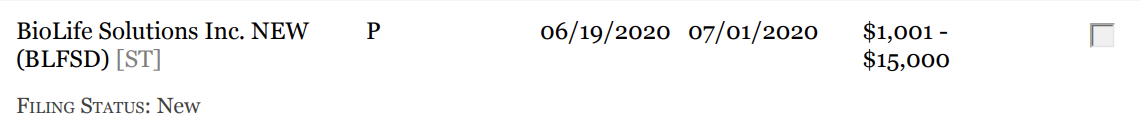
Thus 2012 should be 2020 indeed. Note that all other information matches. (2021-08-26 is the disclosure date while 2020-07-01 is the notification date so they do not need to be the same.)

We extract month and year values from `transaction_date` column and stored them in `transaction_month` and `transaction_year` for later graphing. 

In [9]:
# assign month and year columns
with_party=with_party.assign(transaction_month=with_party['transaction_date'].dt.month)
with_party=with_party.assign(transaction_year=with_party['transaction_date'].dt.year)

We are want to know if the data is stored consistently over years. We figured that the data is insufficient in 2017 and 2018.   

In [10]:
with_party.value_counts('transaction_year') # check how many records in each year

transaction_year
2020    6901
2021    5207
2019    1085
2022    1056
2018      22
2017       2
dtype: int64

### Univariate Analysis & Intersting Aggregates

After basic data cleaning, we are interested in political party information. Draw the bar plot of transaction counts of political affiliation. We found Democratic representatives made more transactions than Republicans from 2017 to 2022 based on the stock dataset. \
Plus, we'd like to know which party made more times of gains out of total transaction during the pandemic (2020). From the second graph, we can see that republicans' gains over $200 proportion is larger than that of the Democratics.\
Note that in the diagrams below we used groupby method to investigate some interesting aggregate information.

,cap_gains_over_200_usd
Party,
Democratic,0.056614
Republican,0.095482


Text(0, 0.5, 'over_200_usd gain proportions')

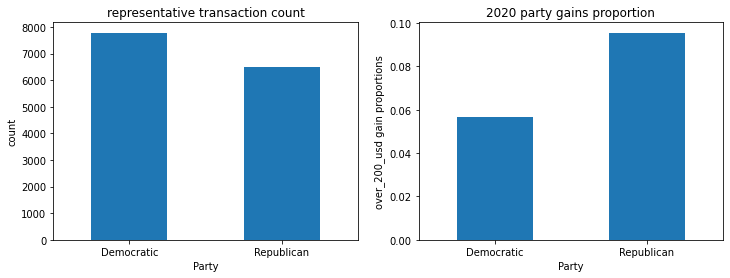

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
# representative transaction counts based on party affilation
with_party.groupby('Party').count()['district']\
.plot(ax=axes[0], kind='bar',title='representative transaction count', rot=0).set_ylabel('count')

# get proportion of cap_gains_over_200_usd of each party
display(with_party[with_party['transaction_year']==2020].groupby('Party')['cap_gains_over_200_usd'].mean().to_frame())
with_party[with_party['transaction_year']==2020].groupby('Party')['cap_gains_over_200_usd'].mean()\
.plot(ax=axes[1],kind='bar',title='2020 party gains proportion', rot=0).set_ylabel('over_200_usd gain proportions')  

We want to know which companies attract representative investors the most. So we apply a sorted bar plot to display the top 10 popular tickers of transactions. We discovered that investors transacted `MSFT` the most, which is Microsoft Corporation, and `AAPL` the second, Apple Inc. Later we will investigate whether the pandemic affected certain transaction choice.

Text(0, 0.5, 'frequency')

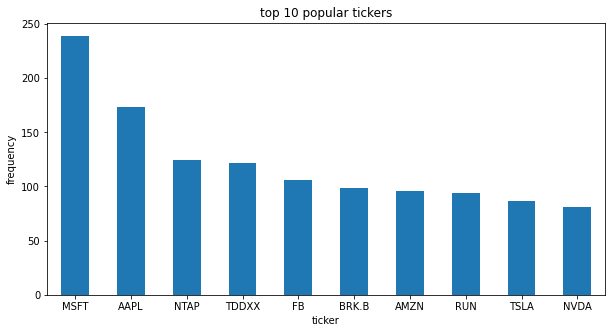

In [12]:
# count tickers' transaction frequencies, and take first 10 largest 
with_party.value_counts('ticker').sort_values(ascending=False)[:10]\
.plot(kind='bar',title='top 10 popular tickers', rot=0, figsize=[10, 5]).set_ylabel('frequency')

Text(0, 0.5, 'frequency')

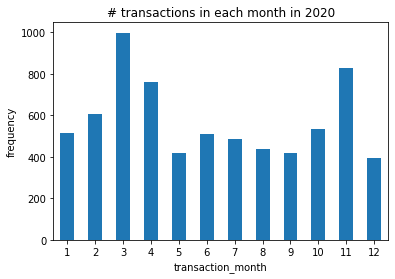

In [13]:
with_party[with_party['transaction_year']==2020].groupby('transaction_month').count()['transaction_date']\
.plot(kind='bar',title='# transactions in each month in 2020', rot=0).set_ylabel('frequency')
# March and Nov. have the most transactions

### Bivariate Analysis

We are investigating two party's investment type distribution. We see that representatives in both party take purchase action the most. The action type distributions of two parties looked kind of similar, and we will discuss if they are actually similar in the hypothesis & permutation test part.

type,exchange,purchase,sale_full,sale_partial
Party,,,,
Democratic,45,3792,2476,1469
Republican,83,3636,2086,686


Text(0, 0.5, 'proportion')

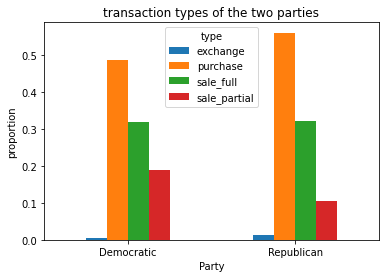

In [14]:
display(with_party.pivot_table(index='Party',columns='type',aggfunc='size'))
(
    with_party
    .pivot_table(index='Party',columns='type',aggfunc='size')
    .apply(lambda x: x/x.sum(),axis=1) # normalize to proportion
    .plot(kind='bar', title='transaction types of the two parties', rot=0).set_ylabel('proportion')
)

We are also interested in the proportion of owners of each type in the two parties (and if they are similar). While the distributions of the two parties' transaction types look similar, the distributions of the two parties' owner types look much different.

owner,dependent,joint,self
Party,,,
Democratic,170,2786,2194
Republican,218,1632,605


Text(0, 0.5, 'proportion')

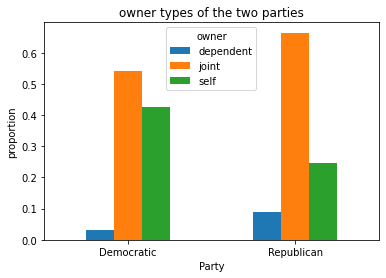

In [15]:
display(with_party.pivot_table(index='Party',columns='owner',aggfunc='size'))
(
    with_party
    .pivot_table(index='Party',columns='owner',aggfunc='size')
    .apply(lambda x: x/x.sum(),axis=1) # normalize to proportion
    .plot(kind='bar', title='owner types of the two parties', rot=0).set_ylabel('proportion')
)

We'd like to know are there any months that Representatives like to transact more. Since data in 2017 and 2018 is inadequate, and 2022 is not ended yet, we only consider 2019, 2020 and 2021. We find that Representatives made much more transactions in  June and December in 2019. In 2020, there is a increase amount of transactions in March, which is the time that quarantine started. Though we cannot say there is a causality, it's interesting to think about.

transaction_year,2019,2020,2021
transaction_month,,,
1,0.054378,0.074337,0.127329
2,0.100461,0.087958,0.191281
3,0.070968,0.144617,0.135971
4,0.091244,0.110129,0.066641
5,0.047926,0.060716,0.063760


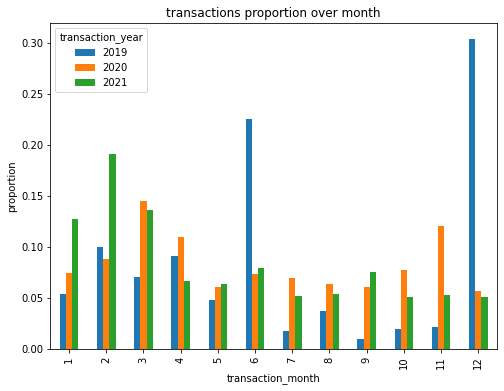

In [31]:
# set pivot table index as transaction_month and column as transaction_year
month_year_pivot=with_party.pivot_table(index='transaction_month',columns='transaction_year',aggfunc='size').dropna(axis=1)\
.apply(lambda x: x/x.sum()) # calculate the proportion of transactions over month

month_year_pivot.plot(kind='bar', figsize=(8,6),title='transactions proportion over month').set_ylabel('proportion')
month_year_pivot.head()

### Assessment of Missingness

In order to assess missingness, we first check which columns have large missing values.

In [16]:
with_party.isna().sum() # check missingness

disclosure_year              0
disclosure_date              0
transaction_date             0
owner                     6668
ticker                    1147
asset_description            4
type                         0
amount                       0
representative               0
district                     0
ptr_link                     0
cap_gains_over_200_usd       0
Party                        0
transaction_month            0
transaction_year             0
dtype: int64

First we want to determine if there are NMAR before checking MAR/MCAR. Let's discuss about the missing values in `ticker` and `asset_description`.
We know that tickers are the stock symbols, and asset description records the information about the stock. Ticker and asset description refers to the same company. So users can always get the information of one column from the other one.\
In order to know if these two columns are NMAR (missing due to its own value), we want to know if there are rows that missing both information at the same time. We can see that there are no rows missing values in two columns at the same time. It means we can always find the stock company information by chekcing the other non-missing column. So we can't say `ticker` or `asset_description` are NMAR.

In [674]:
# take a look at missed ticker rows
with_party[(with_party['ticker'].isna())&(with_party['asset_description'].isna())].head() 

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,Party,transaction_month,transaction_year


Given `Zimmer Biomet Holdings` as an example, we have searched online that it has ticker named 'ZBH'. So the stock company information can be extracted from its asset_description. In another word, the value in `ticker` depends on `asset_descprition`, and vice versa. Thus, they are not NMAR

In [678]:
with_party[with_party['ticker'].isna()].head() # take a look at missed ticker rows

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,Party,transaction_month,transaction_year
56,2020,2020-09-22,2020-08-17,NaN,NaN,Metallic Minerals Corp.,sale_partial,"$100,001 - $250,000",Mr. TJ John (Tj) Cox,CA21,https://disclosures-clerk.house.gov/public_dis...,True,Republican,8,2020
57,2021,2021-03-23,2021-01-27,self,NaN,Zimmer Biomet Holdings,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,1,2021
58,2021,2021-03-23,2021-02-08,NaN,NaN,Zimmer Biomet Holdings,sale_full,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,2,2021
59,2021,2021-03-23,2021-02-08,self,NaN,Zimmer Biomet Holdings,purchase,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,2,2021
61,2021,2021-03-23,2021-02-19,self,NaN,Celegene Corp,sale_full,"$15,001 - $50,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,2,2021


Note that `owner` has a 6668 missing values, almost half of the values in the owner column are missing, which is non-trivial. So we do need to check if the missingness of the owner column depend on some other columns or not.\
Before that, we don't think it's MD, because all transitions have owner types. Then is it NMAR? We don't think it is NMAR either, the data collectors are the third-party and objective, there's no reason for them to hide `owner` information from public.

In [32]:
with_party['owner'].isna().mean() # proportion of missingness in owner

0.46717578644994046

We assign a new column `owner_null` to store bool value of missingness in `owner`. And use `owner_null` dataframe in this section.

In [18]:
owner_null=with_party.assign(owner_null=with_party['owner'].isna())
owner_null.head()

,disclosure_year,disclosure_date,transaction_date,owner,ticker,asset_description,type,amount,representative,district,ptr_link,cap_gains_over_200_usd,Party,transaction_month,transaction_year,owner_null
0,2021,2021-10-04,2021-09-27,joint,BP,BP plc,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican,9,2021,False
1,2021,2021-10-04,2021-09-13,joint,XOM,Exxon Mobil Corporation,purchase,"$1,001 - $15,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican,9,2021,False
2,2021,2021-10-04,2021-09-10,joint,ILPT,Industrial Logistics Properties Trust - Common...,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican,9,2021,False
3,2021,2021-10-04,2021-09-28,joint,PM,Phillip Morris International Inc,purchase,"$15,001 - $50,000",Hon. Virginia Foxx,NC05,https://disclosures-clerk.house.gov/public_dis...,False,Republican,9,2021,False
4,2021,2021-10-04,2021-09-17,self,BLK,BlackRock Inc,sale_partial,"$1,001 - $15,000",Hon. Alan S. Lowenthal,CA47,https://disclosures-clerk.house.gov/public_dis...,False,Democratic,9,2021,False


We'd like to create a function to check relationship between missing values in `owner` column and values in another input column. We use permutation test to decide if the missingness of the values in the owner column depends on some other column (and thus is MAR).

In [19]:
def check_missingness(other_col): 
    '''
    The function takes in another column's name, other_col, and do permutation test to check whether missingness 
    of owner depends on other_col. 
    '''
    # assign obs to store observed tvd of distributions of other_col with missed and not missed owner value
    obs=owner_null.pivot_table(index='owner_null', columns=other_col, aggfunc='size')\
    .apply(lambda x: x / x.sum(), axis=1)\
    .diff().iloc[-1, :].abs().sum() / 2
    # assign shuffled to be copy of owner_null, so we can shuffle owner_null column without changing original df
    shuffled=owner_null.copy()
    n_repetitions = 500
    tvds = []
    # do permutation for n_repetition times
    for _ in range(n_repetitions):
        # Shuffling missing owner and assigning back to the DataFrame
        shuffled['owner_null'] = np.random.permutation(shuffled['owner_null'])

        # generate pivot table of distributions of other_col indexed by missingness of owner column
        pivoted = (
            shuffled
            .pivot_table(index='owner_null', columns=other_col, aggfunc='size')
            .apply(lambda x: x / x.sum(), axis=1)
        )
        # Computing and storing TVD of distributions based on shuffled owner missingness
        tvd = pivoted.diff().iloc[-1,:].abs().sum() / 2
        tvds.append(tvd)
    # calculate p-val which is proportion of tvd that beyond observed tvd
    pval=np.mean(np.array(tvds)>obs)
    return obs, tvds, pval

### Owner vs. Party

We want to know if missingness of owner depends on the party of the representatives. First, take a look at observed distribution of Party from a pivot table.

In [20]:
# proportion of party based on whether owner is missed or not
party_dist = owner_null.pivot_table(index='owner_null', columns='Party', aggfunc='size') 
party_dist = party_dist.T / party_dist.sum(axis=1) # observed proportion, will calculate observed tvd from it
party_dist

owner_null,False,True
Party,,
Democratic,0.677186,0.394721
Republican,0.322814,0.605279


By drawing the plot of simulated TVDs and the observed TVD, we found the observed TVD is much greater. Therefore, we believe the missingness of the values in the owner column do depend on the `Party` column.

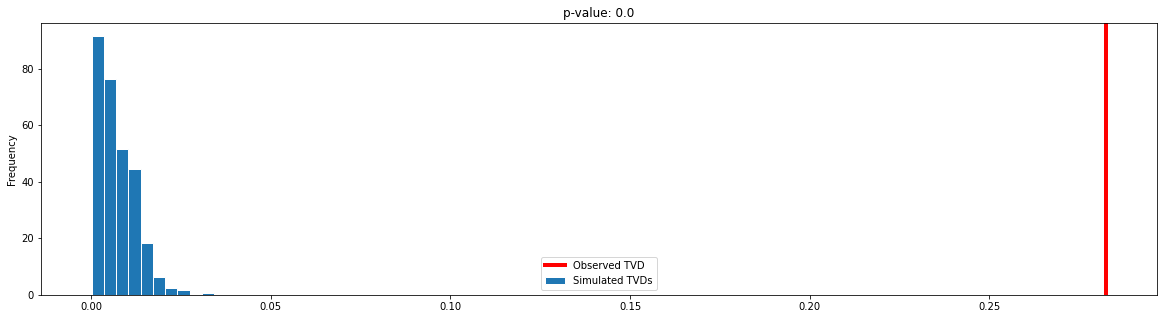

In [36]:
obs, tvds, pval = check_missingness('Party') # do permutation test on owner to see if Party have different distribution
plt.figure(figsize=(20,5))
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs, color='red', linewidth=4, label='Observed TVD')
plt.legend()

We check that the p value is 0, which is smaller than 0.05 and agrees with the above result.\
We reject H0, `Party` values of missed owner rows and `Party` values of non-missed owner rows are not from same distributions. So missingness of `owner` depends on `Party`

In [22]:
pval

0.0

### Owner vs. type

We also want to know if missingness of owner depends on the transaction types. First, take a look at observed distribution of `type` from a pivot table.

In [38]:
# proportion of type based on whether owner is missed or not
type_dist = owner_null.pivot_table(index='owner_null', columns='type', aggfunc='size')
type_dist = type_dist.T / type_dist.sum(axis=1)
type_dist

owner_null,False,True
type,,
exchange,0.007627,0.010498
purchase,0.548455,0.488452
sale_full,0.287179,0.356629
sale_partial,0.156739,0.144421


By drawing the plot of simulated TVDs and the observed TVD, we found the observed TVD is much greater. Therefore, we believe the missingness of the values in the owner column do depend on the type column.

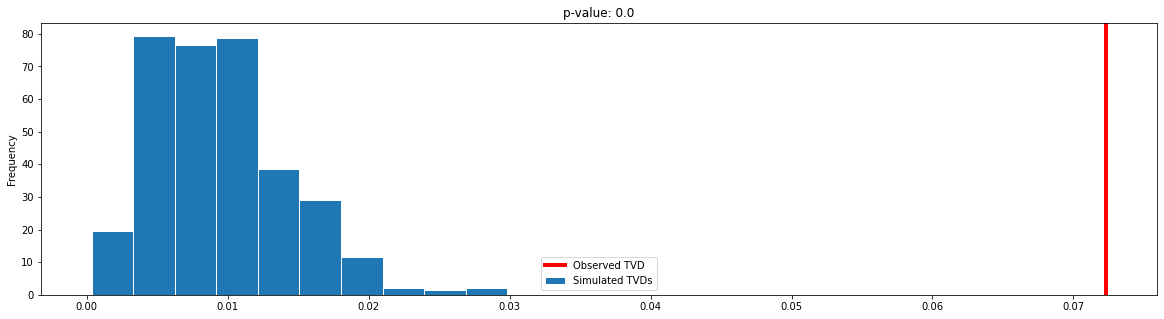

In [24]:
obs, tvds, pval = check_missingness('type') # do permutation test on owner to see if type have different distribution
plt.figure(figsize=(20,5))
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs, color='red', linewidth=4, label='Observed TVD')
plt.legend()

We check that the p value is 0, which is smaller than 0.05 and agrees with the above result.\
We reject H0, `type` values of missed owner rows and `type` values of non-missed owner rows are not from same distributions. So missingness of `owner` depends on `type`

In [25]:
pval

0.0

### Owner vs. cap_gains_over_200_usd

We want to know if missingness of owner depends on the `cap_gains_over_200_usd column`. Take a look at observed distributions of `cap_gains_over_200_usd column` based on missingness in `owner`.

In [39]:
# distribution of whether cap gain over 200 under the condition of missingness in owner
cap_dist = owner_null.pivot_table(index='owner_null', columns='cap_gains_over_200_usd', aggfunc='size')
cap_dist = cap_dist.T / cap_dist.sum(axis=1)
cap_dist

owner_null,False,True
cap_gains_over_200_usd,,
False,0.95503,0.906719
True,0.04497,0.093281


By drawing the plot of simulated TVDs and the observed TVD, we found the observed TVD is much greater. Therefore, we believe the missingness of the values in the owner column do depend on the `cap_gains_over_200_usd` column.

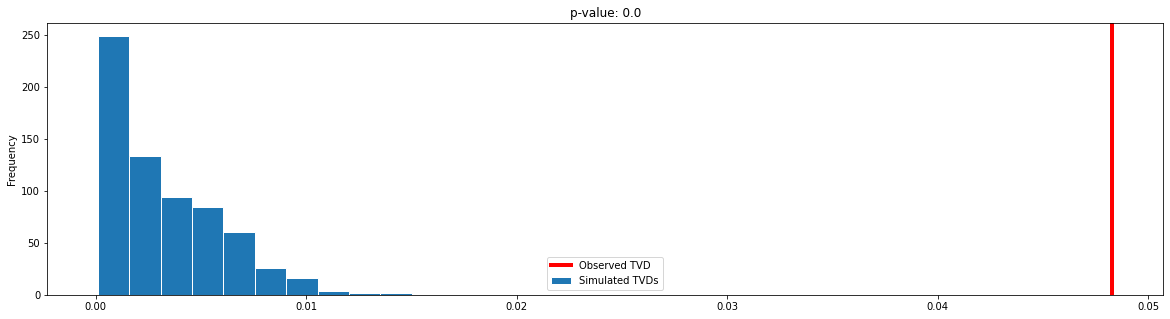

In [27]:
obs, tvds, pval = check_missingness('cap_gains_over_200_usd') # do permutation test on owner to see if over_200 have different distribution
plt.figure(figsize=(20,5))
pd.Series(tvds).plot(kind='hist', density=True, ec='w', bins=10, title=f'p-value: {pval}', label='Simulated TVDs')
plt.axvline(x=obs, color='red', linewidth=4, label='Observed TVD')
plt.legend()

We check that the p value is 0, which is still smaller than 0.05 and agrees with the above result.\
We reject H0, `cap_gains_over_200_usd` values of missed owner rows and `cap_gains_over_200_usd` values of non-missed owner rows are not from same distributions. So missingness of `owner` depends on `cap_gains_over_200_usd`

In [28]:
pval

0.0

Since we checked that missingness of `owner` depends on `Party`, `type` and `cap_gains_over_200_usd`, we conclude that missingness of `owner` is MAR.

### Hypothesis Testing

### Amazon transacted more in 2020?

After checking missingness type, we'd like to grasp more information between columns. We have seen that Amazon is one of the most popular companies representatives like to invest on from top_10_popular_ticker graph. During the pandemic, people rely more on shipments, so does Amazon stock attract investors more? We want to explore whether Amazon stock is transacted more often in 2020 than in other years.

Since different year has different amount of transactions, we normalize the amount of Amazon transaction to the proportion of Amazon transaction out of all transactions. So if the proportion in 2020 is significantly larger, we can conclude that Amazon's stock attracts more Representatives. 

H0: proportion of amazon transaction in 2020 = proportion of amazon transactions in average\
H1: proportion of amazon transaction in 2020 > proportion of amazon transactions in average

Since Amazon transaction in 2020 is part of transactions in all years, we do hypothesis test by drawing random samples, and compute the proportion of amazon in those samples. If observed proportion is significantly larger than generated proportions, we will conclude that Amazon is transacted more in 2020.

0.757

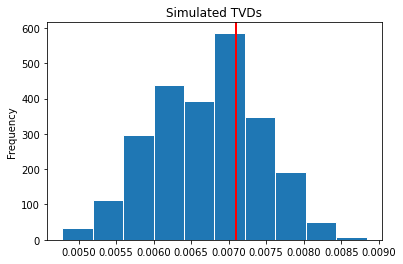

In [29]:
# assign obs_amzn_2020 to store observed amazon proportion in 2020
obs_amzn_2020 = with_party[(with_party['ticker']=='AMZN') & (with_party['transaction_year']==2020)].shape[0]\
                /with_party[with_party['transaction_year']==2020].shape[0]
# assign num_2020 to store total number of transactions in 2020, which is number of random sample we want to draw
num_2020=with_party[with_party['transaction_year']==2020].shape[0]

props=[]
# draw random sample and do hypothesis test for 1000 times
for i in range(1000):
    # generate random sample of same size as number of 2020 years
    sample=with_party.sample(num_2020)
    # compute the proportion of Amazon transactions
    prop=(sample['ticker']=='AMZN').mean()
    # append prop to props list
    props.append(prop)
    
# visualize p-val
pd.Series(props).plot(kind='hist', 
                     density=True,
                     ec='w',
                     title='Simulated TVDs');
plt.axvline(x=obs_amzn_2020, color='red', linewidth=2);

# pval is the proportion of generated props that are equal or more exetreme than observed prop
pval=np.mean(obs_amzn_2020>=np.array(props))
pval

Since p-val=0.742>0.05, we fail to reject H0. We don't have sufficient evidence to say amazon were transacted more often in 2020. 

### Republic & Democratic have same distribution on transaction type?

Next, we want to know whether Republic party and Democratic party hold the similar transaction type? As we see from EDA, the distributions of `type` look similar for two Party.

H0: Their transaction type follows same distribution\
H1: Their transaction type doesn't follow same distribution

Since two party belong to two samples, we need to use permutation test. If two party have similar `type` distribution, after we shuffle one of the columns, the tvd should be close to observed tvd.

0.0

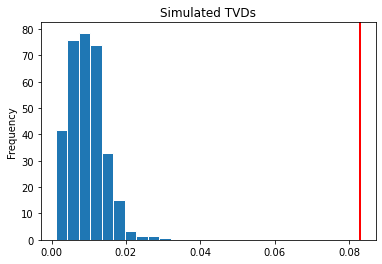

In [30]:
# assign obs to store tvd of type distribution between two party
obs=with_party.pivot_table(index='Party', columns='type', aggfunc='size').apply(lambda x: x / x.sum(), axis=1)\
    .diff().iloc[-1,:].abs().sum() / 2
# assign shuffled be copy of with_party df, so we won't modify original df
shuffled=with_party.copy()
n_repetitions = 500
tvds = []
for _ in range(n_repetitions):

    # Shuffling Party column and assigning back to the DataFrame, so information is randomized
    shuffled['Party'] = np.random.permutation(shuffled['Party'])

    # Computing and storing TVD
    pivoted = (
        shuffled
        .pivot_table(index='Party', columns='type', aggfunc='size')
        .apply(lambda x: x / x.sum(), axis=1)
    )
    # calculate tvd of shuffled df
    tvd = pivoted.diff().iloc[-1,:].abs().sum() / 2
    tvds.append(tvd)

# visualize p-val
pd.Series(tvds).plot(kind='hist', 
                     density=True,
                     ec='w',
                     title='Simulated TVDs');
plt.axvline(x=obs, color='red', linewidth=2);
# assign pval to be proportion of tvds larger or equal to observed tvd
pval=np.mean(np.array(tvds)>=obs)
pval

Since pval=0<0.05, we reject H0. We have sufficient evidence to say two distributions of type are not the same, meanding two party have different transaction type.